```
Name: Fatih Arslan Tugay
```

# Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from itertools import cycle
from dt import DecisionTreeClassifier

# Exploratory Data Analysis(EDA)

## Read and Edit Dataset

In [2]:
iris = pd.read_csv('Iris.csv')
iris = iris.drop(columns = "Id")
spc = {'Iris-setosa': 0, 
       'Iris-versicolor': 1, 
       'Iris-virginica':2}
iris["Species"] = [spc[item] for item in iris["Species"]]

## Data Summary

In [3]:
display(iris)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [4]:
print(iris["SepalLengthCm"].describe())
print(iris["SepalWidthCm"].describe())
print(iris["PetalLengthCm"].describe())
print(iris["PetalWidthCm"].describe())

count    150.000000
mean       5.843333
std        0.828066
min        4.300000
25%        5.100000
50%        5.800000
75%        6.400000
max        7.900000
Name: SepalLengthCm, dtype: float64
count    150.000000
mean       3.054000
std        0.433594
min        2.000000
25%        2.800000
50%        3.000000
75%        3.300000
max        4.400000
Name: SepalWidthCm, dtype: float64
count    150.000000
mean       3.758667
std        1.764420
min        1.000000
25%        1.600000
50%        4.350000
75%        5.100000
max        6.900000
Name: PetalLengthCm, dtype: float64
count    150.000000
mean       1.198667
std        0.763161
min        0.100000
25%        0.300000
50%        1.300000
75%        1.800000
max        2.500000
Name: PetalWidthCm, dtype: float64


## Duplicates in the Dataset

In [5]:
display(iris[iris.duplicated()])
display(iris.duplicated().sum())

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
34,4.9,3.1,1.5,0.1,0
37,4.9,3.1,1.5,0.1,0
142,5.8,2.7,5.1,1.9,2


3

## Balance of Dataset

In [6]:
iris["Species"].value_counts()

0    50
1    50
2    50
Name: Species, dtype: int64

<AxesSubplot:title={'center':'Species Count'}, xlabel='Species', ylabel='count'>

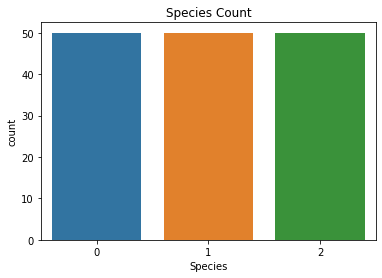

In [7]:
plt.title("Species Count") 
sns.countplot(x = iris["Species"])

**Dataset is balanced**

## Null Values

In [8]:
display(iris.isnull().sum(axis = 0))

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

**There are no null values**

## How the Length and Width Vary According to the Species

<AxesSubplot:xlabel='Species', ylabel='SepalWidthCm'>

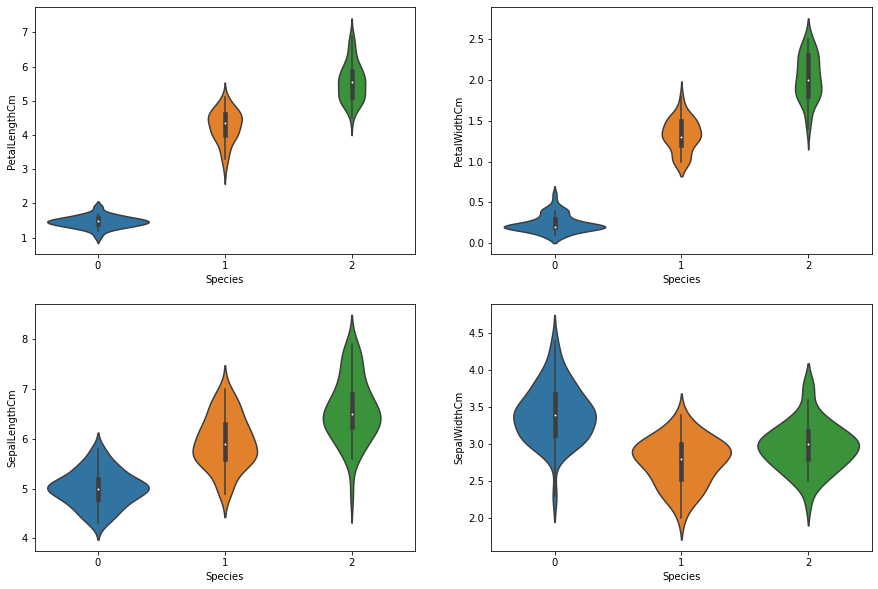

In [9]:
plt.figure(figsize = (15,10))
plt.subplot(2,2,1)
sns.violinplot(x = 'Species', y = 'PetalLengthCm', data = iris)
plt.subplot(2,2,2)
sns.violinplot(x = 'Species', y = 'PetalWidthCm', data = iris)
plt.subplot(2,2,3)
sns.violinplot(x = 'Species', y = 'SepalLengthCm', data = iris)
plt.subplot(2,2,4)
sns.violinplot(x = 'Species', y = 'SepalWidthCm', data = iris)

**Don't forget: 0=Setosa, 1=Versicolor, 2=Virginica**

## Cluster Map

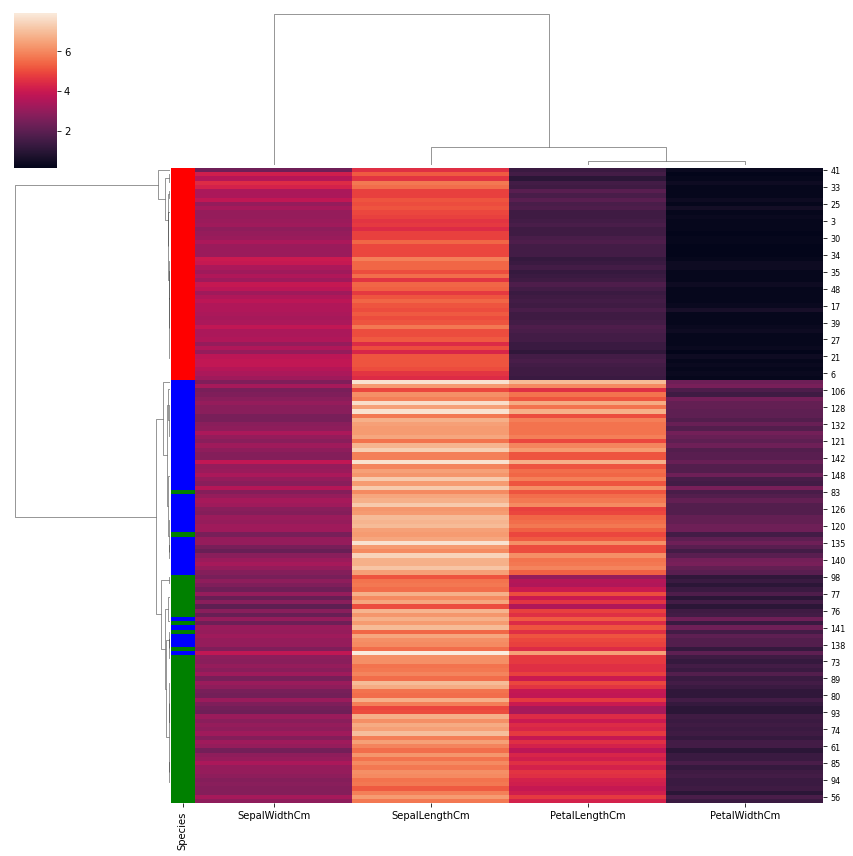

In [10]:
df = iris.loc[:, ["SepalLengthCm", "SepalWidthCm", "PetalLengthCm", "PetalWidthCm"]]
df1 = iris.Species
x = dict(zip(df1.unique(), "rgb"))
row_colors = df1.map(x)
cg = sns.clustermap(df, row_colors = row_colors, figsize = (12, 12), metric = "correlation")
plt.setp(cg.ax_heatmap.yaxis.get_majorticklabels(), rotation = 0, size = 8)
plt.show()

## Correlation Matrix of Features and Target 

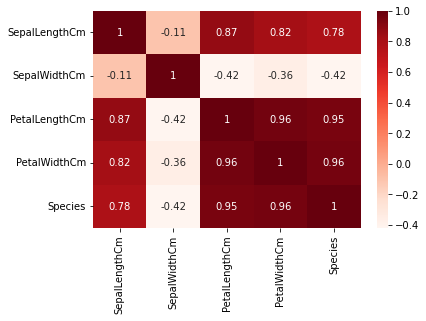

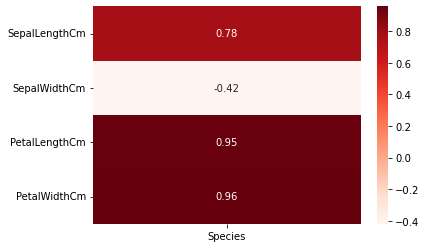

In [11]:
cm = iris.corr()
ft = cm.drop(columns = ["SepalLengthCm", "SepalWidthCm", "PetalLengthCm", "PetalWidthCm"])
ft = ft.drop(labels = ["Species"])
sns.heatmap(cm, annot = True, cmap = plt.cm.Reds)
plt.show()
sns.heatmap(ft, annot = True, cmap = plt.cm.Reds)
plt.show()

## Pair-Plots for Features 

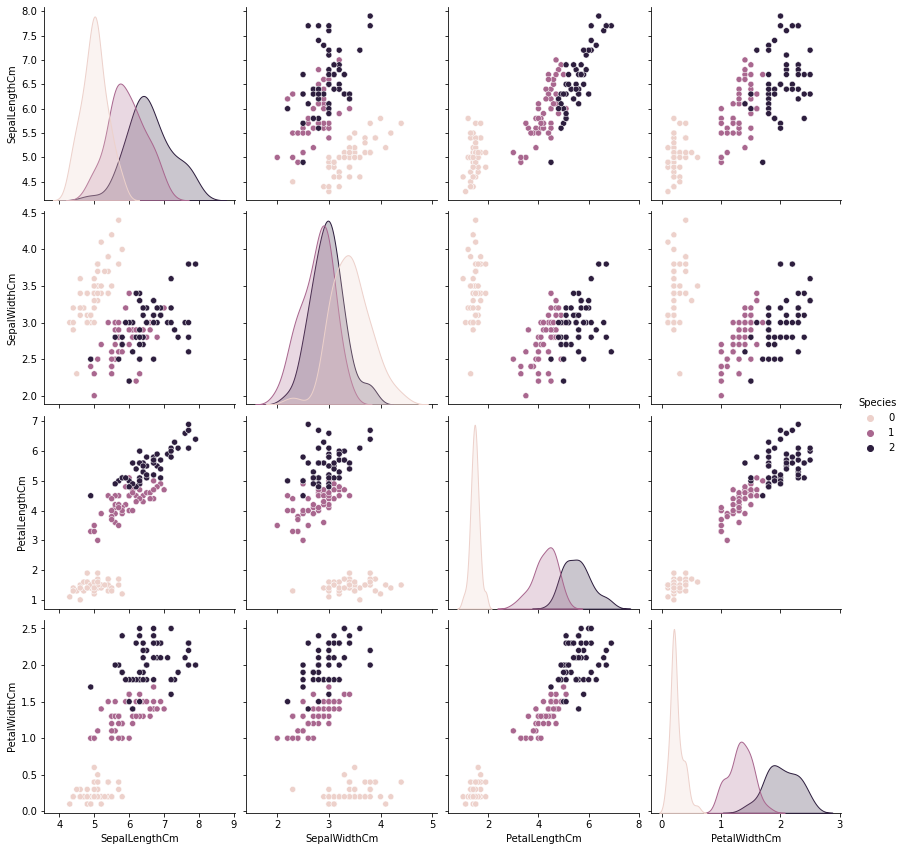

In [12]:
sns.pairplot(iris, hue = "Species", height = 3, diag_kind = "kde")

**Setosa (shown with 0) type seems to be seen in a more separate region than other flower types in terms of flower characteristics.**

# Train the classifier

## Call Classifier Class with Depth 5

In [13]:
clf = DecisionTreeClassifier(max_depth=5)

## Split Data to Test (%80) and Train (%20)

In [14]:
X=iris.values.tolist();
y=[];
for row in X:
    y.append(int(row[4]));
    del row[4];
X=pd.Series(X);
y=pd.Series(y);
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True)

X_train_list=X_train.values.tolist();
y_train_list=y_train.values.tolist();
X_test_list=X_test.values.tolist();
y_test_list=y_test.values.tolist();

## Train Model

In [15]:
clf.fit(X_train_list,y_train_list)


## Predict Class of Test Values 

In [16]:
yhat = clf.predict(X_test_list)
print("Test Features Expected Classification")
print(y_test_list)
print("Prediction")
print(yhat)
xhat = clf.predict(X_train_list)
print("Train Features Expected Classification")
print(y_train_list)
print("Prediction")
print(xhat)

Test Features Expected Classification
[1, 2, 1, 2, 0, 0, 0, 1, 2, 0, 2, 0, 0, 1, 2, 2, 2, 2, 2, 2, 0, 0, 2, 0, 2, 0, 1, 2, 2, 1]
Prediction
[1, 2, 1, 2, 0, 0, 0, 1, 2, 0, 2, 1, 0, 1, 2, 2, 2, 2, 2, 2, 0, 0, 2, 0, 2, 0, 1, 2, 2, 1]
Train Features Expected Classification
[1, 0, 0, 2, 1, 1, 1, 1, 0, 1, 2, 0, 1, 0, 1, 0, 0, 2, 2, 0, 1, 1, 0, 2, 2, 1, 0, 0, 0, 1, 0, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 2, 2, 0, 1, 2, 2, 1, 0, 2, 0, 1, 1, 0, 0, 0, 1, 0, 2, 0, 2, 0, 1, 0, 0, 2, 2, 2, 2, 2, 2, 1, 1, 0, 0, 2, 1, 0, 1, 2, 2, 0, 1, 1, 2, 2, 2, 1, 2, 0, 0, 1, 1, 1, 2, 2, 2, 0, 1, 2, 1, 0, 0, 0, 0, 2, 2, 0, 1, 0, 2, 2]
Prediction
[1, 0, 0, 2, 1, 1, 1, 1, 0, 1, 2, 0, 1, 0, 1, 0, 0, 2, 2, 0, 1, 1, 0, 2, 2, 1, 0, 0, 0, 1, 0, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 2, 1, 1, 0, 0, 1, 0, 1, 2, 2, 0, 1, 2, 2, 1, 0, 2, 0, 1, 1, 0, 0, 0, 1, 0, 2, 0, 2, 0, 1, 0, 0, 2, 2, 2, 2, 2, 2, 1, 1, 0, 1, 2, 2, 0, 1, 2, 2, 0, 1, 1, 2, 2, 2, 1, 2, 0, 0, 1, 1, 1, 2, 2, 2, 0, 1, 2, 2, 0, 0, 0, 0, 2, 2, 0, 1, 0, 1, 

# Results

## Confusion Matrix

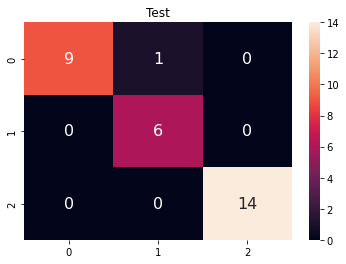

In [17]:
plt.title("Test") 
y_pred2 = pd.Series(yhat)
y_test2 = pd.Series(y_test_list)
mt = metrics.confusion_matrix(y_test2, y_pred2)
df_cm = pd.DataFrame(mt, range(3), range(3))
sns.heatmap(df_cm,annot=True,annot_kws={"size":16})
plt.show()

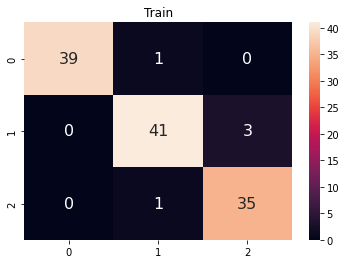

In [18]:
plt.title("Train") 
x_pred2 = pd.Series(xhat)
x_test2 = pd.Series(y_train_list)
mt = metrics.confusion_matrix(x_test2,x_pred2)
df_cm = pd.DataFrame(mt, range(3), range(3))
sns.heatmap(df_cm,annot=True,annot_kws={"size":16})
plt.show()

## F1-Score

In [19]:
f1 = metrics.f1_score(y_test2, y_pred2, average='weighted')
print("F1-Score Test:")
print(f1)

f1t=metrics.f1_score(x_test2, x_test2, average='weighted')
print("F1-Score Train:")
print(f1t)

F1-Score Test:
0.9670715249662618
F1-Score Train:
1.0



## Accuracy 

In [20]:
accuracy = metrics.accuracy_score(y_test2, y_pred2)
print("Accuracy Test:")
print(accuracy)
accuracy2 = metrics.accuracy_score(x_test2, x_test2)
print("Accuracy Train")
print(accuracy2)

Accuracy Test:
0.9666666666666667
Accuracy Train
1.0


## Precision 

In [21]:
precision = metrics.precision_score(y_test2, y_pred2, average='weighted')
print("Precusion Test:")
print(precision)
precision2 = metrics.precision_score(x_test2, x_pred2, average='weighted')
print("Precision Training")
print(precision2)

Precusion Test:
0.9714285714285714
Precision Training
0.9592615259077929


## Recall 

In [22]:
recall = metrics.recall_score(y_test2,y_pred2, average="weighted")
print("Recall Test")
print(recall)
recall2 = metrics.recall_score(x_test2,x_pred2, average="weighted")
print("Recall Train")
print(recall2)

Recall Test
0.9666666666666667
Recall Train
0.9583333333333334


## Plot of ROC Curve and Value of AUC

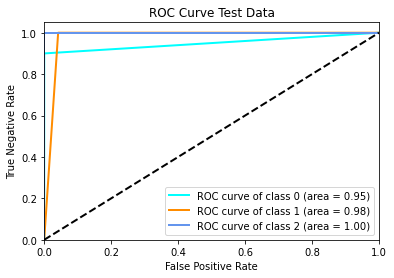

Macro Auc Value:
0.9763888888888889


In [23]:
y_testb = label_binarize(y_test2, classes = [0, 1, 2])
y_predb = label_binarize(y_pred2, classes = [0, 1, 2])

fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(3):
    fpr[i], tpr[i], _ =roc_curve(y_testb[:,i], y_predb[:,i])
    roc_auc[i] = auc(fpr[i], tpr[i])

all_fpr = np.unique(np.concatenate([fpr[i] for i in range(3)]))
mean_tpr = np.zeros_like(all_fpr)
for i in range(3):
    mean_tpr +=np.interp(all_fpr, fpr[i], tpr[i])
    
mean_tpr/=3
fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
for i, color in zip(range(3), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2, label = 'ROC curve of class {0} (area = {1:0.2f})'.format(i, roc_auc[i]))

plt.plot([0,1], [0,1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Negative Rate')
plt.title('ROC Curve Test Data')
plt.legend(loc="lower right")
plt.show()
print("Macro Auc Value:")
print(roc_auc["macro"])

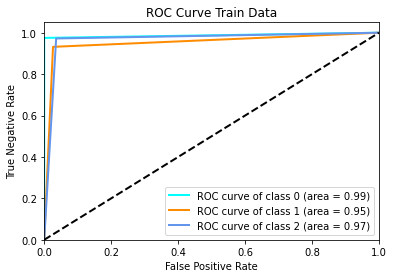

Macro Auc Value:
0.9695017214754057


In [24]:
x_testb = label_binarize(x_test2, classes = [0, 1, 2])
x_predb = label_binarize(x_pred2, classes = [0, 1, 2])

fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(3):
    fpr[i], tpr[i], _ =roc_curve(x_testb[:,i], x_predb[:,i])
    roc_auc[i] = auc(fpr[i], tpr[i])

all_fpr = np.unique(np.concatenate([fpr[i] for i in range(3)]))
mean_tpr = np.zeros_like(all_fpr)
for i in range(3):
    mean_tpr +=np.interp(all_fpr, fpr[i], tpr[i])
    
mean_tpr/=3
fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
for i, color in zip(range(3), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2, label = 'ROC curve of class {0} (area = {1:0.2f})'.format(i, roc_auc[i]))

plt.plot([0,1], [0,1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Negative Rate')
plt.title('ROC Curve Train Data')
plt.legend(loc="lower right")
plt.show()
print("Macro Auc Value:")
print(roc_auc["macro"])